## MRI TECHNIQUE CONCEPTS APPLIED TO PHILIPS MAGNETS:

This document needs the files 
1. hip.jpg, 
2. ripples.jpeg, 
3. eiffel tower.jpg and 
4. eiffel tower wide.jpg 
5. sacrumh.jpg
6. doggy.png

stored in Drive (Folder: 'Aliasing with python') uploaded by clicking on the left menu before beginning the simulation.

#### SPATIAL RESOLUTION VERSUS SNR: STRIKING A BALANCE

<img src="https://user-images.githubusercontent.com/9312897/152430729-a3936daa-198e-4a3b-9c4e-97050df706ff.png"  width="600" height="400" />

The ROI's are in the very same spot of the very same injected contrast. As we pushed the resolution on the right to see better the labral tear, noise starts creeping in, and what is a pointy distribution on the left becomes much broader: SD on the left 15 and SD on the right 24. This is exactly the basis of all calculations of CNR in papers.

#### RECTANGULAR FIELD OF VIEW:

Rectangular FoV is possible. The dissociation of voxel size and FoV is an advantage in this regard.

The field-of- view (FOV) is inversely related to the spacing $(\Delta k)$ of samples in k-space. Different sampling rates along the frequency and phase axes, i.e. $\text{FOV}_\nu = 1 / \Delta k_\text f$ and $\text{FOV}_{\text p} = 1 / \Delta k_\text{p}$ will result in rectangular FOV. For example, a rectangular FOV with a $1:2$ ratio is obtained by sampling alternate phase-encode lines in k-space while leaving the phase-encoding gradient unchanged. This will half the number of phase-encoding steps, and the increment between successive steps. 
The sampling rate and hence the field-of-view in the frequency-encode direction is unchanged.  Furthermore, because both the FOV in the phase direction and number of steps have been reduced by one-half, pixel size in the phase-encode direction (FOVp / Np) and overall spatial resolution of the image are also unchanged. 

The [pixel size won't change](https://mriquestions.com/field-of-view-fov.html) if the minimum and maximum frequencies are unaltered:

>The defined field-of view (FOV) and pixel width (Δw) determine the number of digitized samples in k-space that must be obtained to reconstruct an image with the desired resolution. FOV is inversely proportional to the spacing between samples in k-space. Specifically, Δk = 1/FOV. 
From symmetry considerations an inverse relation also holds between pixel width (Δw) and the range between the highest positive (+kmax) and negative (−kmax) spatial frequencies in k-space. Defining kFOV = (+kmax) − (−kmax) = 2 kmax, the relationship is given by Δw = 1/kFOV.

However in a [rectangular FoV](https://mriquestions.com/rectangular-fov.html) aliasing is a consideration.

Since the MRI signal is essentially collected in Fourier space, and then inverse transformed into image space, we can get a jpeg, Fourier transform (FFT = DFT) it, and then see what happens when every other column or row is deleted off the Fourier matrix of complex sinusoids: the spacing between frequencies (or phase) between the remaining columns or rows will increase, which is the equivalent of a less steep frequency (or phase) gradient. However, the bandwidth, understood as the range of frequencies will remain the same. The FoV is $\text{FoV ~ BW / Gradient}.$ Therefore, the FoV will decrease.

The fact that the range of frequencies was intended for a higher number of rows (or columns) by the sampling theorem, will result in aliasing: essentially the highest frequency has to cover an entire cycle per pixel, but we have reduced the number of pixels by half, and the higher frequencies will now wrap-around.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

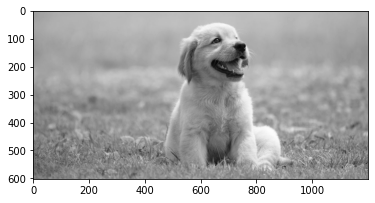

In [ ]:
import cv2

doggy = cv2.imread('doggy.jpg',0)
plt.imshow(doggy, cmap = 'gray')

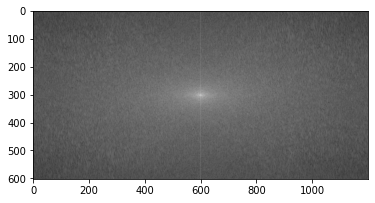

In [ ]:
# fft 
fdoggy = np.fft.fft2(doggy)
# shift the center
fdoggyshifted = np.fft.fftshift(fdoggy)

freqdoggy = np.log(np.abs(fdoggyshifted))
plt.imshow(abs(freqdoggy), cmap='gray')

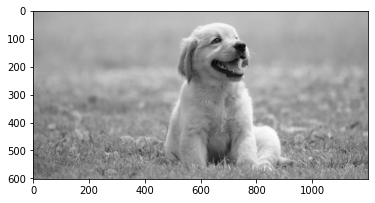

In [ ]:
# inverse fft 
fdoggy_shifted = np.fft.ifftshift(fdoggyshifted)
img_back_doggy = np.fft.ifft2(fdoggy_shifted)
img_back_doggy = np.abs(img_back_doggy)
plt.imshow(img_back_doggy, cmap = 'gray')

(602, 600)


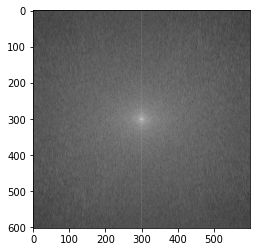

In [ ]:
# Rectangular FoV: Eliminating every other frequency (50 percent) leaves the Bw intact, and increases spacing between 
# Frequencies in k-space. The matrix (in the phase direction to save time) will be reduced by half.
z = fdoggyshifted
matz = z[:,np.arange(0,np.shape(z)[1],2)] # Takes out every other column off the frequencies.
print(matz.shape)
freqz = np.log(np.abs(matz))
plt.imshow(freqz, cmap='gray')

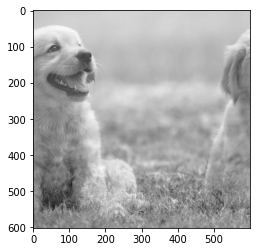

In [ ]:
# inverse fft 
fz_ishift = np.fft.ifftshift(matz)
img_back_z = np.fft.ifft2(matz)
img_back_z = np.abs(img_back_z)
plt.imshow(img_back_z, cmap = 'gray')

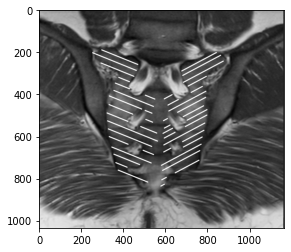

In [ ]:
import cv2

sacrum = cv2.imread('sacrumh.jpg',0)
plt.imshow(sacrum, cmap = 'gray')

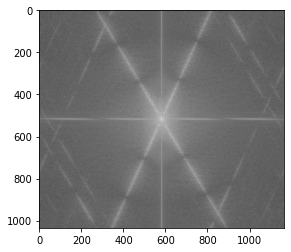

In [ ]:
# fft 
fsacrum = np.fft.fft2(sacrum)
# shift the center
fsacrumshifted = np.fft.fftshift(fsacrum)

freqsac = np.log(np.abs(fsacrumshifted))
plt.imshow(abs(freqsac), cmap='gray')

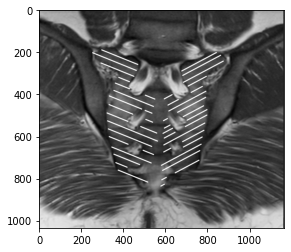

In [ ]:
# inverse fft 
fsacrum_ishift = np.fft.ifftshift(fsacrumshifted)
img_back_sacrum = np.fft.ifft2(fsacrum_ishift)
img_back_sacrum = np.abs(img_back_sacrum)
plt.imshow(img_back_sacrum, cmap = 'gray')

(1035, 582)


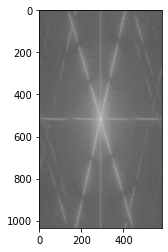

In [ ]:
w = fsacrumshifted
matw = w[:,np.arange(0,np.shape(w)[1],2)] # Takes out every other column off the frequencies.
print(matw.shape)
freqw = np.log(np.abs(matw))
plt.imshow(freqw, cmap='gray')

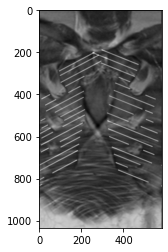

In [ ]:
# inverse fft 
fw_ishift = np.fft.ifftshift(matw)
img_back_w = np.fft.ifft2(matw)
img_back_w = np.abs(img_back_w)
plt.imshow(img_back_w, cmap = 'gray')

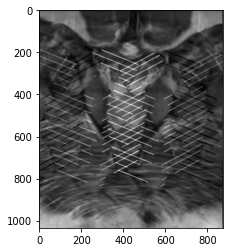

In [ ]:
n = 4
matw = w[:, np.mod(np.arange(np.shape(w)[1]), n)!=0] # Takes out every n column off the frequencies.
fw_ishift = np.fft.ifftshift(matw)
img_back_w = np.fft.ifft2(matw)
img_back_w = np.abs(img_back_w)
plt.imshow(img_back_w, cmap = 'gray')

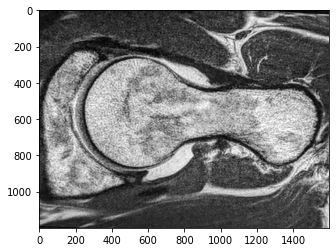

In [ ]:
import cv2

img = cv2.imread('hip.jpg',0)
plt.imshow(img, cmap = 'gray')

# fft 
fhip = np.fft.fft2(img)
# shift the center
fhipshifted = np.fft.fftshift(fhip)
# inverse fft 
fhip_ishift = np.fft.ifftshift(fhipshifted)
img_back_hip = np.fft.ifft2(fhip_ishift)
img_back_hip = np.abs(img_back_hip)
plt.imshow(img_back_hip, cmap = 'gray')

(600, 1600)


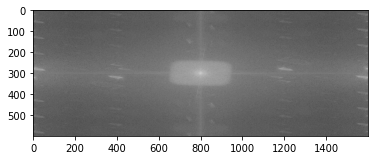

In [ ]:
v = fhipshifted
n = 2
matv = v[np.arange(0,np.shape(v)[0],n)] # Takes out every other row off the frequencies.
print(matv.shape)
freqv = np.log(np.abs(matv))
plt.imshow(freqv, cmap='gray')

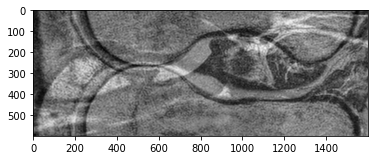

In [ ]:
# inverse fft 
fv_ishift = np.fft.ifftshift(matv)
img_back_v = np.fft.ifft2(matv)
img_back_v = np.abs(img_back_v)
plt.imshow(img_back_v, cmap = 'gray')

(1200, 800)


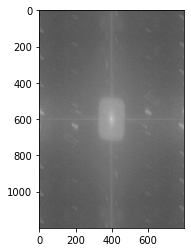

In [ ]:
matw = v[:,np.arange(0,np.shape(v)[1],2)] # Takes out every other row off the frequencies.
print(matw.shape)
freqw = np.log(np.abs(matw))
plt.imshow(freqw, cmap='gray')

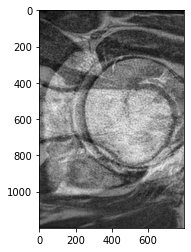

In [ ]:
# inverse fft 
fw_ishift = np.fft.ifftshift(matw)
img_back_w = np.fft.ifft2(matw)
img_back_w = np.abs(img_back_w)
plt.imshow(img_back_w, cmap = 'gray')

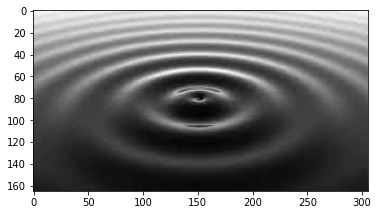

In [ ]:
import scipy.fftpack
import cv2

from PIL import Image
img = Image.open('ripples.jpeg').convert('L')
plt.imshow(img, cmap = 'gray')

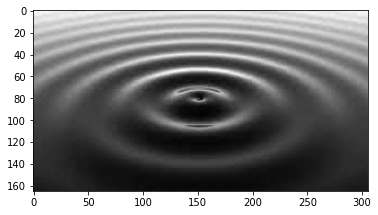

In [ ]:
# fft 
f = np.fft.fft2(img)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

(83, 306)


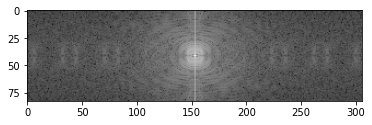

In [ ]:
x = fshifted
mat = x[np.arange(0,np.shape(x)[0],2)] # Takes out every other row off the frequencies.
print(mat.shape)
freq = np.log(np.abs(mat))
plt.imshow(freq, cmap='gray')

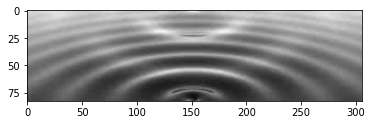

In [ ]:
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

In [ ]:
A = np.array([[1,-1,2,3],[3,2,0,-7],[23,44,77,-9],[3,43,11,-87]])
print(A)
B = A[np.arange(0,np.shape(A)[1],2)]
print(B)
print(B.shape[1])
B[:,np.arange(0,np.shape(A)[1],2)]

[[  1  -1   2   3]
 [  3   2   0  -7]
 [ 23  44  77  -9]
 [  3  43  11 -87]]
[[ 1 -1  2  3]
 [23 44 77 -9]]
4


array([[ 1,  2],
       [23, 77]])

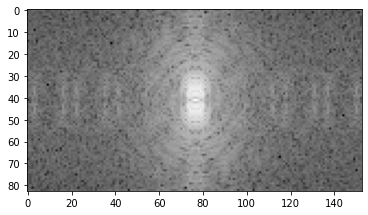

In [ ]:
mat2 = mat[:,np.arange(0,np.shape(mat)[1],2)] # Takes out every other col off the frequencies.
freq2 = np.log(np.abs(mat2))
plt.imshow(freq2, cmap='gray')

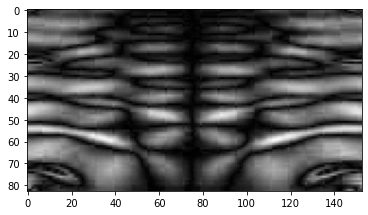

In [ ]:
# inverse fft 
f_ishift2 = np.fft.ifftshift(mat2)
img_back2 = np.fft.ifft2(mat2)
img_back2 = np.abs(img_back2)
plt.imshow(img_back2, cmap = 'gray')

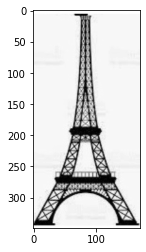

In [ ]:
img = Image.open('eiffel tower.jpg').convert('L')
plt.imshow(img, cmap = 'gray')
# fft 
f = np.fft.fft2(img)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

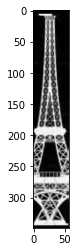

In [ ]:
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[1],3)] # Eliminating every third column in k-space reduces 1/3 the FoV from side to side (freq dir), but there is aliasing.
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

(362, 403)


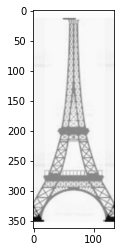

In [ ]:
img = Image.open('eiffel tower wide.jpg').convert('L')
plt.imshow(img, cmap = 'gray')
# fft 
f = np.fft.fft2(img)
print(f.shape)
# shift the center
fshifted = np.fft.fftshift(f)
# inverse fft 
f_ishift = np.fft.ifftshift(fshifted)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')
x = fshifted
mat = x[:,np.arange(0,np.shape(x)[1],3)]
# inverse fft 
f_ishift = np.fft.ifftshift(mat)
img_back = np.fft.ifft2(mat)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

#### ACQUISITION TIME:

$$\text{Acquisition time}=\frac{ \text{TR} \times \text{matrix (Ph.)} \times \text{NEX}\times \text{packages}}{\text{ETL}\times \text{SENSE accel.}}$$

1. For 2D acquitions:

![](https://user-images.githubusercontent.com/9312897/150390862-2f9bf675-3e11-4e96-bd41-590e5f02851a.png)

2. For 3D acquisitions:

![](https://user-images.githubusercontent.com/9312897/150391890-61baaa19-51b9-4d68-94b3-17661ed1d040.png)

MRI scanners will select the necessary number of packages to cover the anatomy given a $\small\text{TR}$ value prescribed for imaging reasons.

If a range from min to max is entered for the $\small\text{TR},$ the minimum value will be selected with the caveat that SAR limits may prevent achieving the minimum prescribed. 

The decrease in time afforded by a lower $\small\text{TR}$ takes precedence over the increase $\small\text{SNR}$ obtained by a longer $\small\text{TR}.$

#### FOLD OVER DIRECTION AND FOLDOVER SUPPRESSION (NO PHASE WRAP):

The direction of the NPW is the phase direction. Always.

In the ankle, doing fold-over suppression in the direction of the tibia (Head to Foot / CC) would be prohibitive. So the idea is to avoid the other ankle by perhaps introducing oversampling. Unintuitively, the foldover in the knee is head to toe because the popliteal vessels are considered to be more of a problem.

The key question seems to be in what direction is worth doing foldover suppression (no-phase wrap).

Foldover suppression can be accomplished with sat bands (REST slabs) as an alternative, which can be more efficient in 1.5 Tesla magnets.

FOS happens along the phase direction, although not necessarily symmetrically around the anatomy covered. If SENSE is being used the FOS will nearly duplicate the FoV (there are system requirement). If no SENSE is used the FOS only needs to cover what the coil can see.

If oversampling has to increase, the rule is to decrease NSA. 

#### SENSE:

SENSE is parallel imaging and has to do with the adjustment of the sensitivity profile of each of the channels of the coil. Using prior information can be used to reduce acquisition time to some extent, but there is a price to pay. The example I was giving is that if we tried to accelerate the acquisition time by doubling the p-value (x 2), since the square root of 2 is 1.4, we would decrease the SNR by 1 / 1.4 = 0.7 (i.e. 30 percent loss in signal).

An acceleration of 1.2 to 1.4 is what we use when the time is more than 4 min. And the square root of 1.2 is approximately 1.1, which means that the drop in SNR is 1 / 1.1 = 0.9 or 10 percent. 

Knowing this could prevent doing something counterproductive, such as using SENSE in a case in which time is not a problem, and then doubling the number of acquisitions (NEX or NSA in Philips lingo) to compensate for the drop in SNR. In a choice like that with an acceleration of 1.2 you'd get your images 20 percent faster with a relative drop in SNR of 10 percent, but then double the acquisition time by averaging.

#### BANDWIDTH

The signal coming from the patient looks squiggly like noise, and it is sampled at regular intervals. 

The analog signal really looks like this:

<img src="https://user-images.githubusercontent.com/9312897/151472584-a257592f-3a5b-43ae-9839-4e32d1e65573.png" width="480" height="300" />

1. The signal increases in amplitude until it reaches a max in the middle (TE).

2. The frequency of oscillations starts really fast on the left , BUT it decreases progressively in frequency as it reaches the midline (the center of k-space).


The **sampling bandwidth** is a property of the ADC, and can be defined equivalently in the frequency domain or in the time (space) domain.

In the time domain is the inverse of the **dwell time**: $\small \text{RBw = }\frac {1}{ \text{Dwell time}}.$

The **acquisition or sample time** of the signal is  $\small \text{Dwell time} \times \text{no. samples (freq. dir.)}.$

In frequency space it is the range of frequencies sampled.

Since there is a duality between a box funtion and a sinc function, a tight range of frequencies will need a longer sampling time during the digitation process.

Each frequency can be sampled by the receiver for a shorter or longer period of time, and the longer each frequency represented in K space is sampled (lower bandwidth), the higher the signal-to-noise (SNR) will be, at the cost of a slower readout rate.

The choice of the space between these intervals determines the receiver bandwidth. This contains all the information from tissue characteristics to location. But it has to be received by the coil and digitized. This is what the ADC converter does. It samples the signal at given intervals (the intervals are always equal). The choice of the space between these intervals determines the receiver bandwidth. Each interval can be thought of as the ADC listening and - here is the first key word - AVERAGING. This average is a sample point in K space.

<img src="https://user-images.githubusercontent.com/9312897/151472369-6f04b901-b4dd-454d-aa3f-a50f495077bb.png" width="480" height="300" />

Two features: the DR in bits, typically in powers of 2 - most common type 16 bit, which in decibels is equivalent to dividing approximately by 6, and calculated as the maximum expected amplitude in the center of k space. This typically allows coverage of the RF frequency after demodulating the Larmor carrier signal. Second, the maximum sampling rate.

---

There is a $1$-to-$1$ correspondence between the number of points in the frequency direction and the number of samples taken from the RF wave coming back from the patient.

The difference between two points in k-space along the frequency direction in Hz will determine the ability to spatially encode the signal coming from different points in space to different pixels: there is a range of frequencies in Hz per pixel, which is the bandwidth.

Looking at it differently, given an equal matrix, a larger difference between the highest and lowest frequencies sampled will correspond to a higher range of frequencies in each pixel [here](https://mriquestions.com/uploads/3/4/5/7/34572113/bandwidth_in_mri_siemens_.pdf).

The FoV is directly proportional to the rBw and indirectly proportional to the frequency gradient strength: $\small \text{FoV}\sim \frac{\text{rBw}}{\text{G}_x}.$ 

A broader range of frequencies sampled will result in a larger FoV if the gradient strength remains unchanged: Keeping the number of sampled points unchanged (matrix in the frequency direction), and remembering that the spatial origin of the signal is frequency encoded, sampling a broader range of frequencies is equivalent to encompassing a larger anatomical segment.

However, if the interest is not in changing the FoV, an increase in the rBw will have to be accompanied by an increase in the strength of the gradientto keep the FoV will be unchanged.

The signal emanating from the patient will contain a broader range of frequencies (stronger gradient), which will demand a shorter interval between samples on the part of the ADC: shorter **dwell time** (reciprocal value to the receiver bandwidth).

If the matrix is constant, there will be broader range of frequencies per pixel. As a consequence the difference in precession frequency between fat and water will not be enough to be noticeably misregistered. Same would apply to misregistration resulting from hardware.

However, each frequency emanating from the patient along the temporal line will be sampled for a shorter period of time, resulting in a reduction in the advantage of averaging noise out. Consequently, there will be a decrease in SNR.

A higher bandwidth will allow a shorter echo time: "Stronger gradients and higher receiver bandwidths shorten the readout duration by increasing the sampling frequency" [here](https://thoracickey.com/fast-scanning-and-k-space-shortcuts/): "as time progresses the signal traces out a trajectory in k-space with the velocity vector of the trajectory proportional to the vector of the applied magnetic field gradient." [here](https://en.wikipedia.org/wiki/Physics_of_magnetic_resonance_imaging#k-space).

---

Illustration of the Shanon-Nyquist theorem:


<img src="https://user-images.githubusercontent.com/9312897/151597748-909c15eb-18df-4cdf-9004-4429eac63016.png" width="480" height="300" />

<img src="https://user-images.githubusercontent.com/9312897/151597953-09d93a49-c5b5-4fad-a2b9-7368e2a47a57.png" width="340" height="300" />

<img src="https://user-images.githubusercontent.com/9312897/151598181-6082a327-f9c2-4ae7-9559-b0c15be15e1f.png" width="490" height="270" />

The sampling rate will work out now, because it is above the Nyquist limit. The sampling rate has to be at least double the frequency in the signal. That is the Nyquist limit to avoid aliasing.


---

Stronger gradient physically distinguishes points in space: the frequencies of spatially adjacent points are further apart, by the Larmor equation. Therefore, to collect data on the same spatial points, a higher range of frequencies is required if the gradient increases (i.e. higher bandwidth).

$$\omega = \gamma B_0$$

where $ω$ is the Larmor frequency in MHz, $γ$ is the gyromagnetic ratio in MHz/Tesla and $B_0$ is the strength of the static magnetic field in Teslas. The gyromagnetic ratio (MHz/T) for hydrogen is $42.58$ MHz/Tesla.

Frequencies encode locations in space and the different frequencies that may separate one anatomical structure from the next one are induced by the gradient in the frequency direction, $\text G_x.$ The FOV is controlled by the ratio of the bandwidth to $\text G_x:$ So $\text{FOV ~ Bandwidth} / \text{G}_x.$ The steeper the gradient, the smaller the FOV, and the higher the bandwidth, the larger the FOV. These are the levers to change the FOV. HOWEVER, when we talk about adjusting the BW we are not talking about changing the FOV!

So this is how I wrap my mind around the concept of the BW: Just move the denominator to the left side of the equation: $\text{BW ~ Gx} \times \text{FOV}.$ Now if the FOV is constant, we end up with a STRAIGHT LINE: $\text{BW} = k \times \text G_x.$ The gradient (Gx) and the BW move together in a linear fashion PROVIDED the FOV is unchanged.

And this is indeed the case: any change in the gradient (with a constant FOV) is accompanied by a concomitant change in the BW!

So now for the punch line... Let's understand things from the perspective of the gradient, because it is so much easier: protons to the left of the image (or the top or whatever side) move faster than the right (or vice versa) because on top of the Larmor precession frequency induced by $B_0$ there is secondary field induced by the gradient. 

What happens when you make the gradient steeper?

A steeper gradient with an identical FOV will imply that frequencies of spatially adjacent points in the anatomy are more separate. And the punch line: with no change in FOV, if the gradient is steeper it will require collecting a higher range of frequencies!

And as a corollary, the binning (allocation) of frequencies into each pixel in the (also unchanged) matrix will be tighter: there will be more difference in frequency from one pixel to the other. Hence, the difference in precession from fat to water resulting from their molecular micro-environment won't be enough to jump from one pixel to the next one. Consequence: less chemical shift with higher frequencies. Same for the dephasing due to metal. 

And the very last point: I emphasized averaging when talking about digitizing the RF signal, and said that was the key. It is! If you wanted to faithfully reproduce the original, the naively smart way would be to get as many sample points as possible, so that the step function closely approximates the original.

But that would work for a polynomial curve, but not in real life: in real life there is noise in the signal: the space between sampling points is spent "listening", and listening, like sampling many subjects in statistics, decreases the variance (the noise). Therefore decreasing the BW increases the SNR.

#### PACKAGES vs STACKS:

Packages are groupings of images within a TR (temporal groups) as opposed to stacks, which are spatial groups, such as slices through different discs in the spine.

Stacks can be prescribed to overlap in space, but if they are not scanned as separate packages there may be cross talk. If all stacks are acquired in one single package, the images are obtained interleaved. Interleaved scans will not increase time.

However, this may lead to multiple stack artifact, for instance between stacks across different discs in the spine: Interference between the different slices occurs which results in signal loss resulting in black lines. To remedy this stacks can be obtained in different packages (Parameter ‘Stacks as packages’).

If the time per stack is not adjustable, then a whole extra stack (= Package, set of TRs) will be required if the number of slices exceeds what fits. So if the min TR necessary to cover 10 slices in the first package is 50, even though there may only be 2 additional slices in the second package, the TR will still be 50.

Packages defines how many times the TR should be divided to better accommodate several groups of slices, in multi-slice scans. In conjunction with TR, the Packages parameter defines in how many single sequential measurements the slices will be distributed by.  It can only affect SNR by changing TR. Increasing the number of packages will lead to increase acquisition time if TR is maintained, because the difference between defined TR and minimal TR increases.

Packages is best used in partnership with turbo factor in order to obtain the best acquisition time out of the desired TR (considering the number of slices), or to attain low TRs, in multi-slice acquisition, when a large number slices are acquired in a single sequence.


<img src="https://user-images.githubusercontent.com/9312897/150151443-45af4389-5fed-4e17-839b-888e4c43ba37.png" width="450" height="350" />

#### INTERPOLATION OR RECONSTRUCTED VOXEL SIZE:

It introduces interpolated frequencies in K-space, which result in increased apparent resolution (less pixelation) by adding zeroes. There is no increase in resolution ("precision"). 

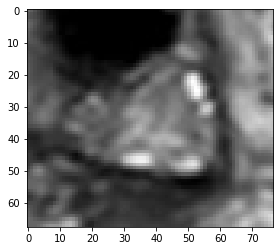

In [ ]:
import cv2

img = cv2.imread('ovary.jpg',0)
plt.imshow(img, cmap = 'gray')

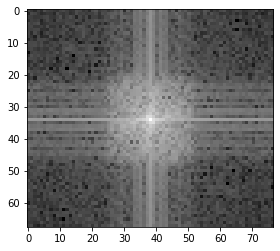

In [ ]:
# fft 
f = np.fft.fft2(img)

# shift the center
fshifted = np.fft.fftshift(f)

freq = np.log(np.abs(fshifted))
plt.imshow(abs(freq), cmap='gray')

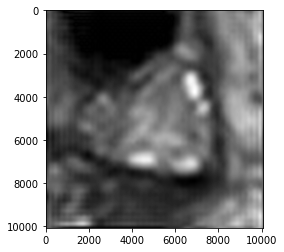

In [ ]:
fshift = np.pad(fshifted,[(0,10000),(0,10000)], mode='constant')

f_ishift = np.fft.ifftshift(fshift)

# inverse fft 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.imshow(img_back, cmap = 'gray')


<img src="https://user-images.githubusercontent.com/9312897/150152662-2347e1ca-cdb0-4adb-9552-2b0bad3a43b1.png" width="450" height="550" />

#### SIGNAL TO NOISE RATIO:

$$\small \text{SNR} \sim \text{Voxel size} \times \sqrt{\frac{\text{No. Phase encoding steps (Matrix phase dir)}\times\text{ No.Averages (NEX)}}{\text{rBW} } }$$



#### RECTANGULAR VOXEL SIZE:


<img src="https://user-images.githubusercontent.com/9312897/150150561-4ea0d9eb-1678-48f9-b969-f3e52fdbc883.png" width="330" height="350" />

<img src="https://user-images.githubusercontent.com/9312897/150150804-3133f99e-4758-4a47-9319-c72f7ddea349.png"  width="320" height="300" />

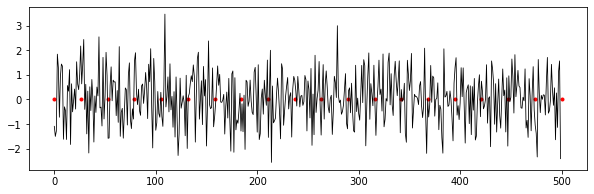

In [ ]:
# Simulation of a RF signal (noise to the human eye) and sampling intervals:

import numpy as np
import matplotlib.pyplot as plt

s = np.random.normal(0,1,500)
x = np.arange(0,len(s))

fig, ax = plt.subplots(1, figsize=(10,3))

plt.plot(x,s, color='k', LineWidth=.8)

x_vals = np.linspace(0,500,20)
y_vals = [0] * len(x_vals)

plt.scatter(x_vals,y_vals, marker='.',color='red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
No handles with labels found to put in legend.


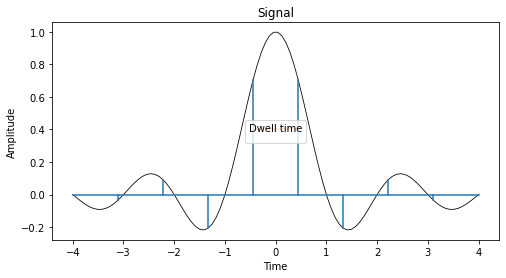

In [ ]:
# Dwell time on a sinc function:

fig = plt.figure(figsize=(8, 4))
x = np.linspace(-4, 4, 100)
np.sinc(x)
v = np.linspace(-4,4,10)
v, w = (v,np.sinc(v))
plt.plot(x, np.sinc(x), color='k', LineWidth=.8)
plt.title("Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.stem(v, w, basefmt= 'C0', markerfmt=' ')
x_coordinates = [v[4], v[5]]
y_coordinates = [0.4, 0.4]
plt.plot(x_coordinates, y_coordinates)
plt.legend(loc='center', title='Dwell time')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


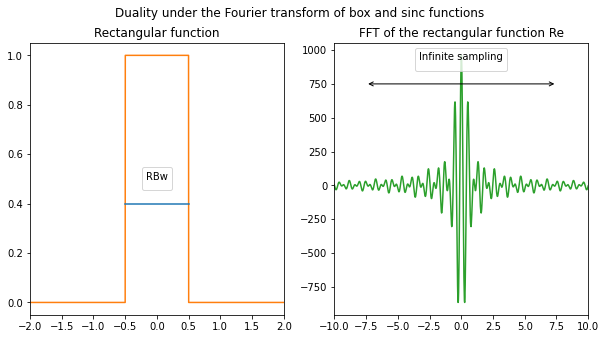

In [ ]:
# Duality time / Fourier: Tighter bandwidth require sampling more frequencies.

import scipy.fftpack
N = 50000 # Number of sampled points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(-2, N*T, N)
y = np.zeros(x.shape)
for i in range(x.shape[0]):
    if x[i] > -0.5 and x[i] < 0.5: y[i] = 1.0

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)
xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Duality under the Fourier transform of box and sinc functions')

axs[0].plot(x, y, 'tab:orange')
axs[0].set_title('Rectangular function')
axs[0].set_xlim(-2,2)
plt.xlim(-2,2)
x_coordinates = [-0.5, 0.5]
y_coordinates = [0.4, 0.4]
axs[0].plot(x_coordinates, y_coordinates)
axs[0].legend(loc='center', title='RBw')

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)

axs[1].plot(xf, np.real(yf),'tab:green')
axs[1].set_title('FFT of the rectangular function Re')
axs[1].set_xlim(-10,10)
x_coordinates = [-8.0, 8.5]
y_coordinates = [800, 800]
axs[1].annotate(s='', xy=(-7.5,750), xytext=(7.5,750), arrowprops=dict(arrowstyle='<->'))
axs[1].legend(loc='upper center', title='Infinite sampling')

plt.show()

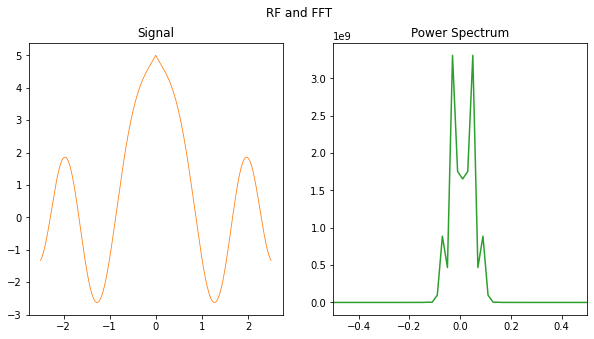

In [ ]:
N = 50000 # Number of sampled points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(-2.5, 2.5, N)
n = 2
y = 5 * np.cos(n * np.log2(abs(x)+1) * x) * np.exp((-np.sign(x))*0.5*x)

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)

power_spectrum = np. square(np. abs(yf))

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('RF and FFT')

axs[0].plot(x, y, 'tab:orange', linewidth=.8)
axs[0].set_title('Signal')

axs[1].plot(xf, power_spectrum,'tab:green')
axs[1].set_title('Power Spectrum')
axs[1].set_xlim(-.5,.5)
x_coordinates = [-5, 5]
y_coordinates = [800, 800]

plt.show()

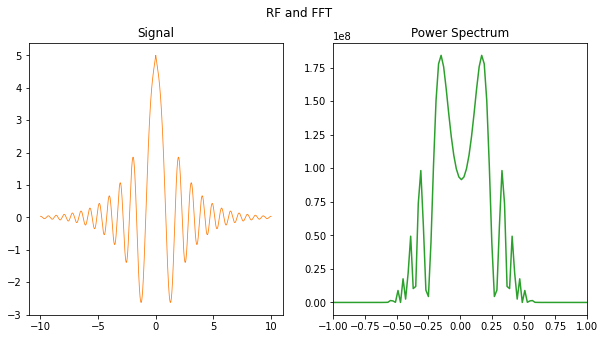

In [ ]:
# Plotting the power spectrum:

N = 50000 # Number of sampled points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(-10, 10, N)
n = 2
y = 5 * np.cos(n * np.log2(abs(x)+1) * x) * np.exp((-np.sign(x))*0.5*x)

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)

power_spectrum = np. square(np. abs(yf))

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('RF and FFT')

axs[0].plot(x, y, 'tab:orange', linewidth=.8)
axs[0].set_title('Signal')

axs[1].plot(xf, power_spectrum,'tab:green')
axs[1].set_title('Power Spectrum')
axs[1].set_xlim(-1,1)
x_coordinates = [-5, 5]
y_coordinates = [800, 800]

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


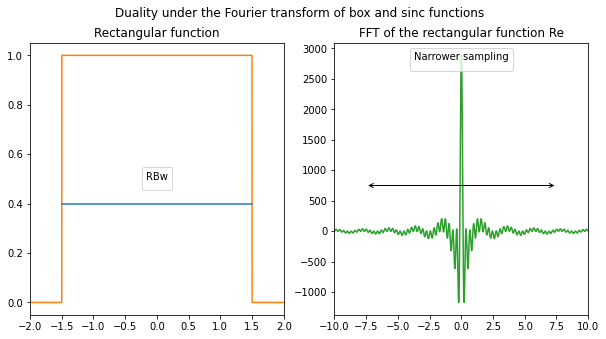

In [ ]:
import scipy.fftpack
N = 50000 # Number of sampled points
T = 1.0 / 1000.0 # sample spacing
x = np.linspace(-2, N*T, N)
y = np.zeros(x.shape)
for i in range(x.shape[0]):
    if x[i] > -1.5 and x[i] < 1.5: y[i] = 1.0

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)
xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Duality under the Fourier transform of box and sinc functions')

axs[0].plot(x, y, 'tab:orange')
axs[0].set_title('Rectangular function')
axs[0].set_xlim(-2,2)
plt.xlim(-2,2)
x_coordinates = [-1.5, 1.5]
y_coordinates = [0.4, 0.4]
axs[0].plot(x_coordinates, y_coordinates)
axs[0].legend(loc='center', title='RBw')

yf = scipy.fftpack.fft(y)
yf = np.fft.fftshift(yf)

axs[1].plot(xf, np.real(yf),'tab:green')
axs[1].set_title('FFT of the rectangular function Re')
axs[1].set_xlim(-10,10)
x_coordinates = [-5.0, 5.5]
y_coordinates = [800, 800]
axs[1].annotate(s='', xy=(-7.5,750), xytext=(7.5,750), arrowprops=dict(arrowstyle='<->'))
axs[1].legend(loc='upper center', title='Narrower sampling')

plt.show()

### **Bandwidth:**

#### Conversion from Hz/pixel (as expressed on PACS) to KHz:

For instance if the BW is $284$ Hz/px and the matrix (frequency is $256$) on a $1.5$ Tesla scan:

$$\text{Hz/px} \times \text{Mat}_{\text{fr}}/1000=284 \times 256/1000=72 \text{ KHz}$$

#### Conversion from Hz/pixel to WFS (pixels):

$$\frac{\text{conversion factor}\cases{1.0 \text{ Tesla, }74\\[2ex]1.5 \text{ Tesla, } 110\\[2 ex]3.0 \text{ Tesla, }220}}{\text{Hz/px}}  =110/284=0.38 \text{ px}\cases{\text{no fat sat, }0.8\text{ px}\\[2ex]\text{fat sat,       }\quad 1.5\text{ px} }$$